# Homework 1

In [17]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score #model evaluation
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import plot_confusion_matrix

In [18]:
BART = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/bis-bas-bart-syn-clean.csv")

## A

In [19]:
# dropping missing values
BART = BART.dropna()

# creating 80/20 TTS
predictors = ["BIS.Score","BAS.Drive.Score","BAS.Fun.Seeking.Score","BAS.Reward.Responsiveness.Score","Age","Female"]
continuous_predictors = ["BIS.Score","BAS.Drive.Score","BAS.Fun.Seeking.Score","BAS.Reward.Responsiveness.Score","Age"]
X = BART[predictors]
y = BART["BART"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## B

In [20]:
# z scoring on continuous/interval variables for both train and test sets
z = StandardScaler()
X_train[continuous_predictors] = z.fit_transform(X_train[continuous_predictors])
X_test[continuous_predictors] = z.transform(X_test[continuous_predictors])

## C

In [21]:
# building and training model
lrModel = LinearRegression()
lrModel.fit(X_train,y_train)

LinearRegression()

## D

In [22]:
# model performance metrics
mae_test = mean_absolute_error(y_test, lrModel.predict(X_test))
r2_test = r2_score(y_test, lrModel.predict(X_test))
print("Test set:")
print("---------mae:", mae_test)
print("---------R^2:", r2_test)

Test set:
---------mae: 10.425532528305983
---------R^2: 0.0336409077081129


In [23]:
mae_train = mean_absolute_error(y_train, lrModel.predict(X_train))
r2_train = r2_score(y_train, lrModel.predict(X_train))
print("Train set:")
print("---------mae:", mae_train)
print("---------R^2:", r2_train)

Train set:
---------mae: 10.50005873809154
---------R^2: 0.0654739739815543


## E

In [24]:
# using ggplot to view the coefficients
coefDF = pd.DataFrame({"Coefficients": lrModel.coef_, "Predictors": predictors})


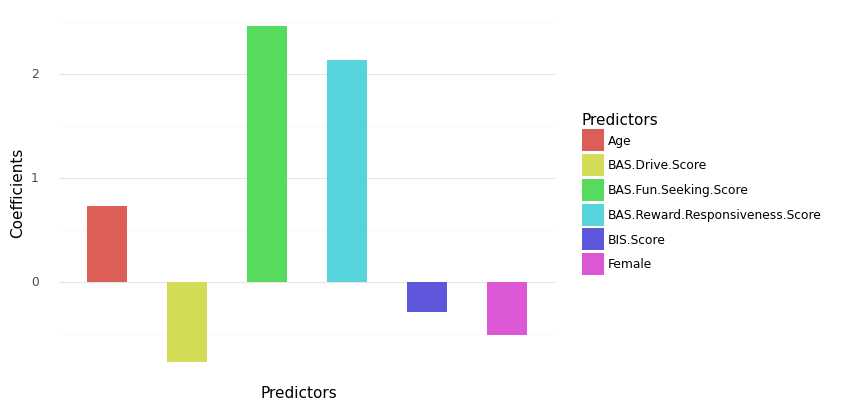

<ggplot: (8731611342065)>

In [25]:
ggplot(coefDF, aes(x = "Predictors", y = "Coefficients", fill = "Predictors")) + geom_bar(stat = "identity", width = 0.5) + theme_minimal() + theme(panel_grid_major_x = element_blank()) + theme(axis_text_x = element_blank())

## F

#### Age, BAS Fun Seeking Score, and BAS Reward Responsiveness Score have positive relationships with BART scores.
#### BAS Drive Score, BIS Score, and female predictors have a negative relationship with BART scores.
#### BAS Fun Seeking Score has the largest impact on BART prediction.

## G

In [26]:
# loading in future data
futureDF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/bis-bas-bart-syn-clean.csv")
# dropping NaN rows
futureDF = futureDF.dropna()
# futureDF.head()

In [27]:
# predicting values for BART score using model

# z scoring the continuous columns of the new dataframe
futureDF[continuous_predictors] = z.transform(futureDF[continuous_predictors])

X_new = futureDF[predictors]

# predicting the BART scores for all people in the dataframe
BART_pred = lrModel.predict(X_new)

# adding predictions to the dataframe
futureDF["P_BART_SCORE"] = BART_pred

# sorting by lowest BART score then taking the first 10 elements
futureDF.sort_values(by="P_BART_SCORE", ascending = True).head(10)

,BIS.Score,BAS.Drive.Score,BAS.Fun.Seeking.Score,BAS.Reward.Responsiveness.Score,Age,Female,BART,P_BART_SCORE
783,-0.844045,-0.363842,-2.065291,-3.123930,-0.032579,1.0,14.375000,10.638011
876,-0.844045,-2.026783,-2.065291,-3.123930,-0.546790,1.0,10.705882,11.542583
668,-0.844045,-1.611048,-2.065291,-3.123930,-0.203983,0.0,10.388889,11.980031
292,-1.985083,-1.195313,-2.065291,-3.123930,0.995844,1.0,18.294118,12.352249
138,0.867513,-0.779577,-1.515638,-2.586242,-0.718194,1.0,13.294118,12.468917
811,0.867513,-0.363842,-1.515638,-2.586242,-0.203983,1.0,18.294118,12.524030
675,0.582253,-0.779577,-1.515638,-2.586242,0.310229,1.0,10.388889,13.300041
381,-0.844045,-0.363842,-0.965986,-3.123930,-0.203983,0.0,37.461539,13.722143
841,0.867513,-0.779577,-2.614944,-0.973177,0.138825,1.0,13.294118,13.832445
842,-1.699823,-1.195313,-0.965986,-3.123930,-0.546790,1.0,13.176471,13.847913


## H

#### Based on the model performance metrics in part D, I have very little faith in this model. With an R^2 value of about 0.05, we know that our model does only slightly better than guessing the mean for every data point. 

## Converting to PDF

In [28]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/CPSC392/Homework1.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Homework1.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
texlive is already the newest version (2019.20200218-1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchp